## Jinlun Zhang
## Student #: 220668810
### Purpose of the notebook: Given a dirty csv data file, clean the data and conduct exploratory analysis which will help the company build a sales strategy for the following year.
#### The company also wants to better understand how various products perform across regions, in order to devise its sales strategy for next year.


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/JinL-Zhang/Schulich_MBAN-6110/main/A1/sales_data.csv")
df.head(10) # display the first 10 records 

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
5,Product_21,Region_8,15.76,20.0,2022-01-06
6,Product_31,Region_10,1.60,11.0,2022-01-07
7,NaN,NaN,NaN,11.0,2022-01-08
8,Product_20,Region_8,9.55,8.0,2022-01-09
9,Product_34,Region_1,58.88,NaN,2022-01-10


In [94]:
# From this .info(), we know that "Sale Date" is the only feature that does not have any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [95]:
# We can see that there is at most 2 purchases completed in a day
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,942,945.000000,943.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_4,Region_5,NaN,NaN,2023-07-31
freq,30,112,NaN,NaN,2
mean,NaN,NaN,108.628011,10.200424,NaN
std,NaN,NaN,167.350086,3.247589,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,26.420000,8.000000,NaN
50%,NaN,NaN,64.640000,10.000000,NaN
75%,NaN,NaN,142.310000,12.000000,NaN


### Remove duplicate data records
#### because it should be safe to assume that the sales that occur in the same region, same date, same price and the same units sold are due to human error during the data collection phase, rather than capturing the actual sales of the products. Thus, it should be sensible to drop the duplicates

In [96]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1026
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      901 non-null    object 
 2   Price       901 non-null    float64
 3   Units Sold  901 non-null    float64
 4   Sale Date   1001 non-null   object 
dtypes: float64(2), object(3)
memory usage: 46.9+ KB


## Visualization (EDA) on the original data 
### Records with missing values are dropped to reduce noises in the dataset 

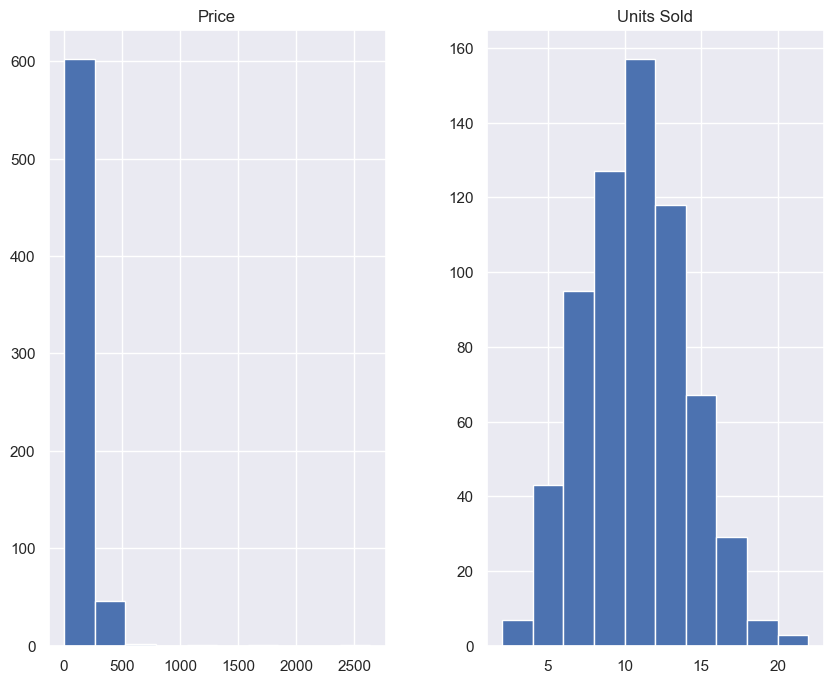

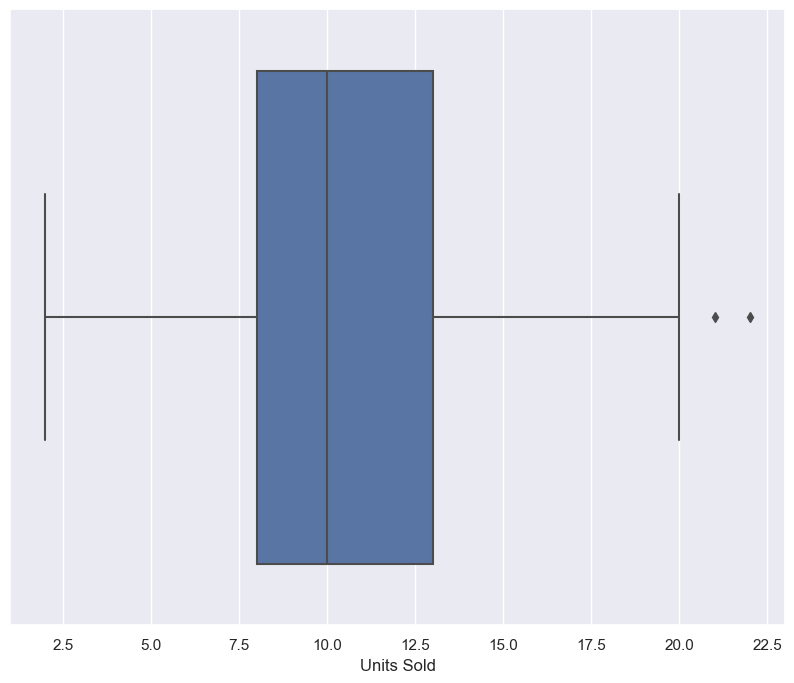

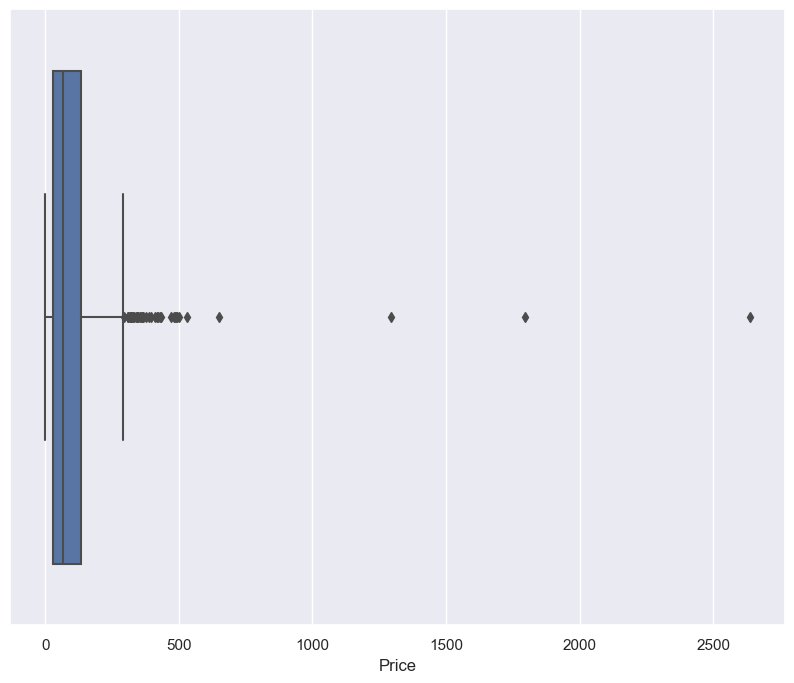

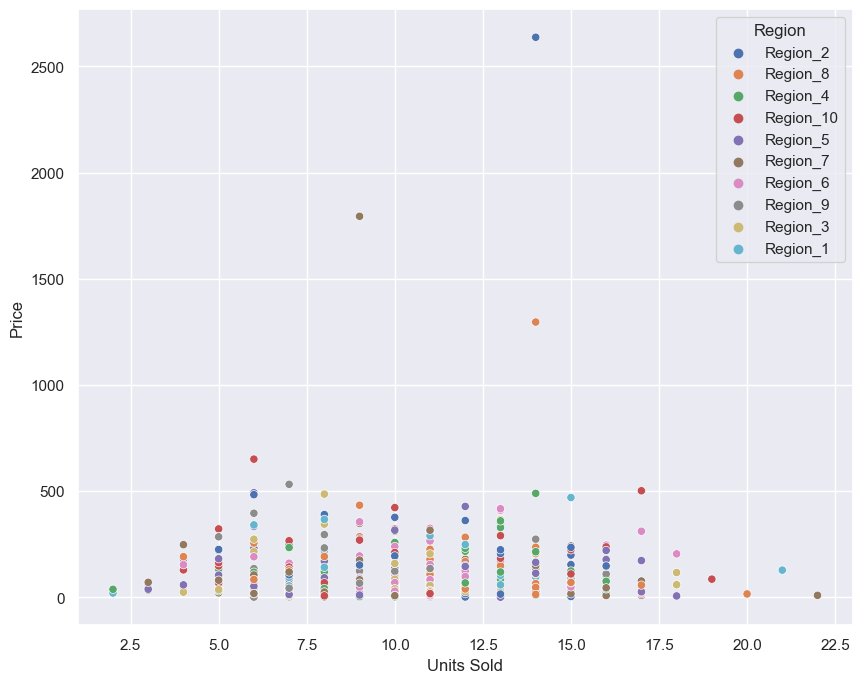

/var/folders/pj/_wjkjh4d5jn_9kq1h6b68bk00000gn/T/ipykernel_51707/1274403482.py:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_no_missing.corr()


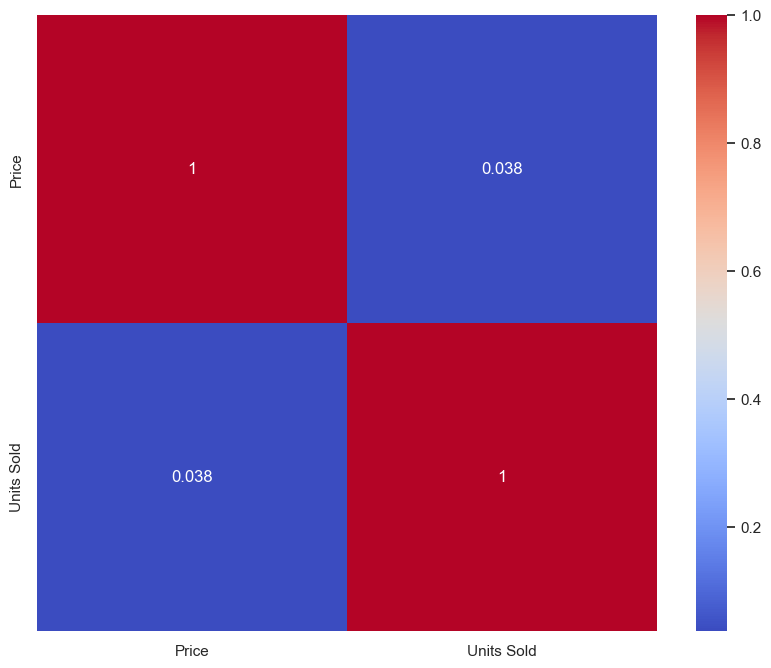

In [113]:
df_no_missing = df.dropna() # drop all rows with missing data

# Histograms
sns.set(rc={'figure.figsize':(10,8)})
df_no_missing.hist() # we can quickly create all histograms at once 
plt.show()

# Box plot of 'Units Sold' variable
sns.boxplot(x='Units Sold', data=df_no_missing)
plt.show()

# Box plot of 'Price' variable
sns.boxplot(x='Price', data=df_no_missing)
plt.show()

# Scatter plot of 'Units Sold', 'Price', with the region being the colour
sns.scatterplot(x='Units Sold', y='Price', hue='Region' , data=df_no_missing)
plt.show()

# Correlation matrix heatmap
# Little correlation between price and # of units sold
corr_matrix = df_no_missing.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Observation: Little correlation between price and the # of units sold. Also, there are many outlier values in the 'Price' feature, while only a few in the 'Units Sold' feature, However, it may not be wise to drop those records with outliter values in this case, because certain products can have higher prices than others in certain regions, while at certain days, the # of units sold can be more than usual

In [114]:
# Interesting discovery below, certain product's price such as Product 34 can range from 20.51 to 2636.90, which is impressive

df_no_missing.groupby('Product').describe()


Price                                                             \
           count        mean         std    min      25%      50%       75%   
Product                                                                       
Product_1   13.0   86.229231   81.418871   7.97  42.7400   75.880  100.2300   
Product_10  14.0  106.107143   80.968550   3.63  41.8050   95.210  128.2350   
Product_11  10.0  109.194000   90.521291  21.70  59.3875   78.720  122.4025   
Product_12  11.0   90.075455   69.085226   2.37  36.5600   84.680  118.9000   
Product_13  14.0  103.817143   87.628988  12.86  30.2500   72.050  152.9275   
Product_14   9.0  105.698889  144.897940  10.35  18.3700   55.650  104.8100   
Product_15  17.0   93.892353  107.434492   5.71  22.9700   39.720  168.2400   
Product_16  11.0   75.833636  113.477293   4.52  10.8550   46.570   69.6800   
Product_17  13.0  120.060000   69.779711  15.90  58.6500  131.350  158.5900   
Product_18   8.0  121.273750  132.170869  16.30  19.8475  101.905  139.4150   
Product_19  14.0  134.382857   86.132665  23.98  76.6950  104.305  199.7250   
Product_2   13.0   59.749231   57.667488   8.80  29.8500   41.140   51.4200   
Product_20  12.0  113.782500  133.586666   9.09  22.4675   35.050  162.3225   
Product_21  12.0  126.741667  137.465775   0.19  48.2425   84.295  161.0025   
Product_22  12.0  147.406667  131.555901   7.59  53.6050   97.125  225.2675   
Product_23  14.0  130.019286  101.316743  19.33  40.9600   95.435  186.9475   
Product_24  22.0   62.638182   50.108892   0.25  27.3200   51.125   73.4775   
Product_25  11.0   88.566364   86.911073   1.96  20.1200   71.920  121.4400   
Product_26  13.0   93.280769  105.266324   8.76  34.9100   46.090  129.7700   
Product_27  18.0  202.655556  420.303962   1.96  25.6950   51.715  154.0575   
Product_28  11.0   85.295455   74.770862  14.60  24.5750   66.710  117.2100   
Product_29  11.0   75.194545   49.892518  10.39  38.6800   62.990  108.4650   
Product_3   15.0   70.050667   74.415906   7.57  24.2750   39.420  102.1150   
Product_30  12.0   88.080833  110.919925   3.61  19.9100   50.905   80.1225   
Product_31  11.0   80.759091   93.365370   1.60  24.3050   48.330   81.4900   
Product_32   9.0   82.523333   68.859463   6.36  34.5100   64.640  137.3800   
Product_33  12.0   88.181667   72.225426  15.30  45.6575   68.240  114.5550   
Product_34  14.0  287.737143  680.102754  20.51  37.5125  129.650  163.5975   
Product_35   9.0   49.167778   22.343434  17.20  33.7900   47.160   67.4100   
Product_36  13.0   98.694615   98.628799   0.27  24.5300   88.620  118.1600   
Product_37  17.0  105.664706  125.155765   4.31  23.3500   39.440  145.1000   
Product_38  13.0  109.129231   69.098563  14.26  44.9800  119.220  135.3100   
Product_39   8.0  121.121250  100.936132   9.31  35.6675   98.280  224.4300   
Product_4   22.0   78.524091   62.133313   6.02  21.8875   57.270  123.9025   
Product_40  18.0  110.760000  119.853461   2.91  34.0125   57.660  138.8975   
Product_41  10.0   66.739000   61.277499  13.16  19.5875   46.350   93.0775   
Product_42  14.0   83.470000   66.134360  17.44  34.8850   63.780  103.7750   
Product_43  19.0   83.074211   68.319049   0.27  39.3800   61.050  104.0200   
Product_44   8.0   88.755000   83.833724  13.08  25.2300   82.905   94.5950   
Product_45  12.0  102.375833   93.604093   6.20  29.8275   86.365  126.5750   
Product_46  13.0  130.662308  131.766758   0.71  45.0500   99.750  135.0300   
Product_47   8.0   70.930000   48.988812  13.46  28.6925   64.510  123.1650   
Product_48  12.0   59.778333   60.658571   6.22  24.8200   51.840   71.3250   
Product_49  19.0  169.046316  282.642620  14.87  44.7450   95.960  175.2200   
Product_5    8.0   73.421250   75.949481   2.06  15.1950   51.085  109.7275   
Product_50  17.0  185.396471  175.344388  19.74  75.2200  141.530  223.8100   
Product_6   11.0  105.290909  103.907297  22.76  31.3000   68.820  129.3150   
Product_7   16.0  118.983750  139.676506   5.79  33.7750   65

In [115]:
# add a new column, sales, to the dataset
df_no_missing['Sales'] = df_no_missing['Price'] * df_no_missing['Units Sold']
df_no_missing

/var/folders/pj/_wjkjh4d5jn_9kq1h6b68bk00000gn/T/ipykernel_51707/996366106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_missing['Sales'] = df_no_missing['Price'] * df_no_missing['Units Sold']


,Product,Region,Price,Units Sold,Sale Date,Sales
1,Product_40,Region_2,46.19,10.0,2022-01-02,461.90
3,Product_6,Region_8,143.47,8.0,2022-01-04,1147.76
4,Product_44,Region_4,122.54,10.0,2022-01-05,1225.40
5,Product_21,Region_8,15.76,20.0,2022-01-06,315.20
6,Product_31,Region_10,1.60,11.0,2022-01-07,17.60
...,...,...,...,...,...,...
994,Product_19,Region_8,83.76,6.0,2024-09-21,502.56
995,Product_41,Region_5,13.16,7.0,2024-09-22,92.12
996,Product_34,Region_8,70.22,15.0,2024-09-23,1053.30
997,Product_3,Region_9,42.79,7.0,2024-09-24,299.53


<Axes: xlabel='Product', ylabel='Sales'>

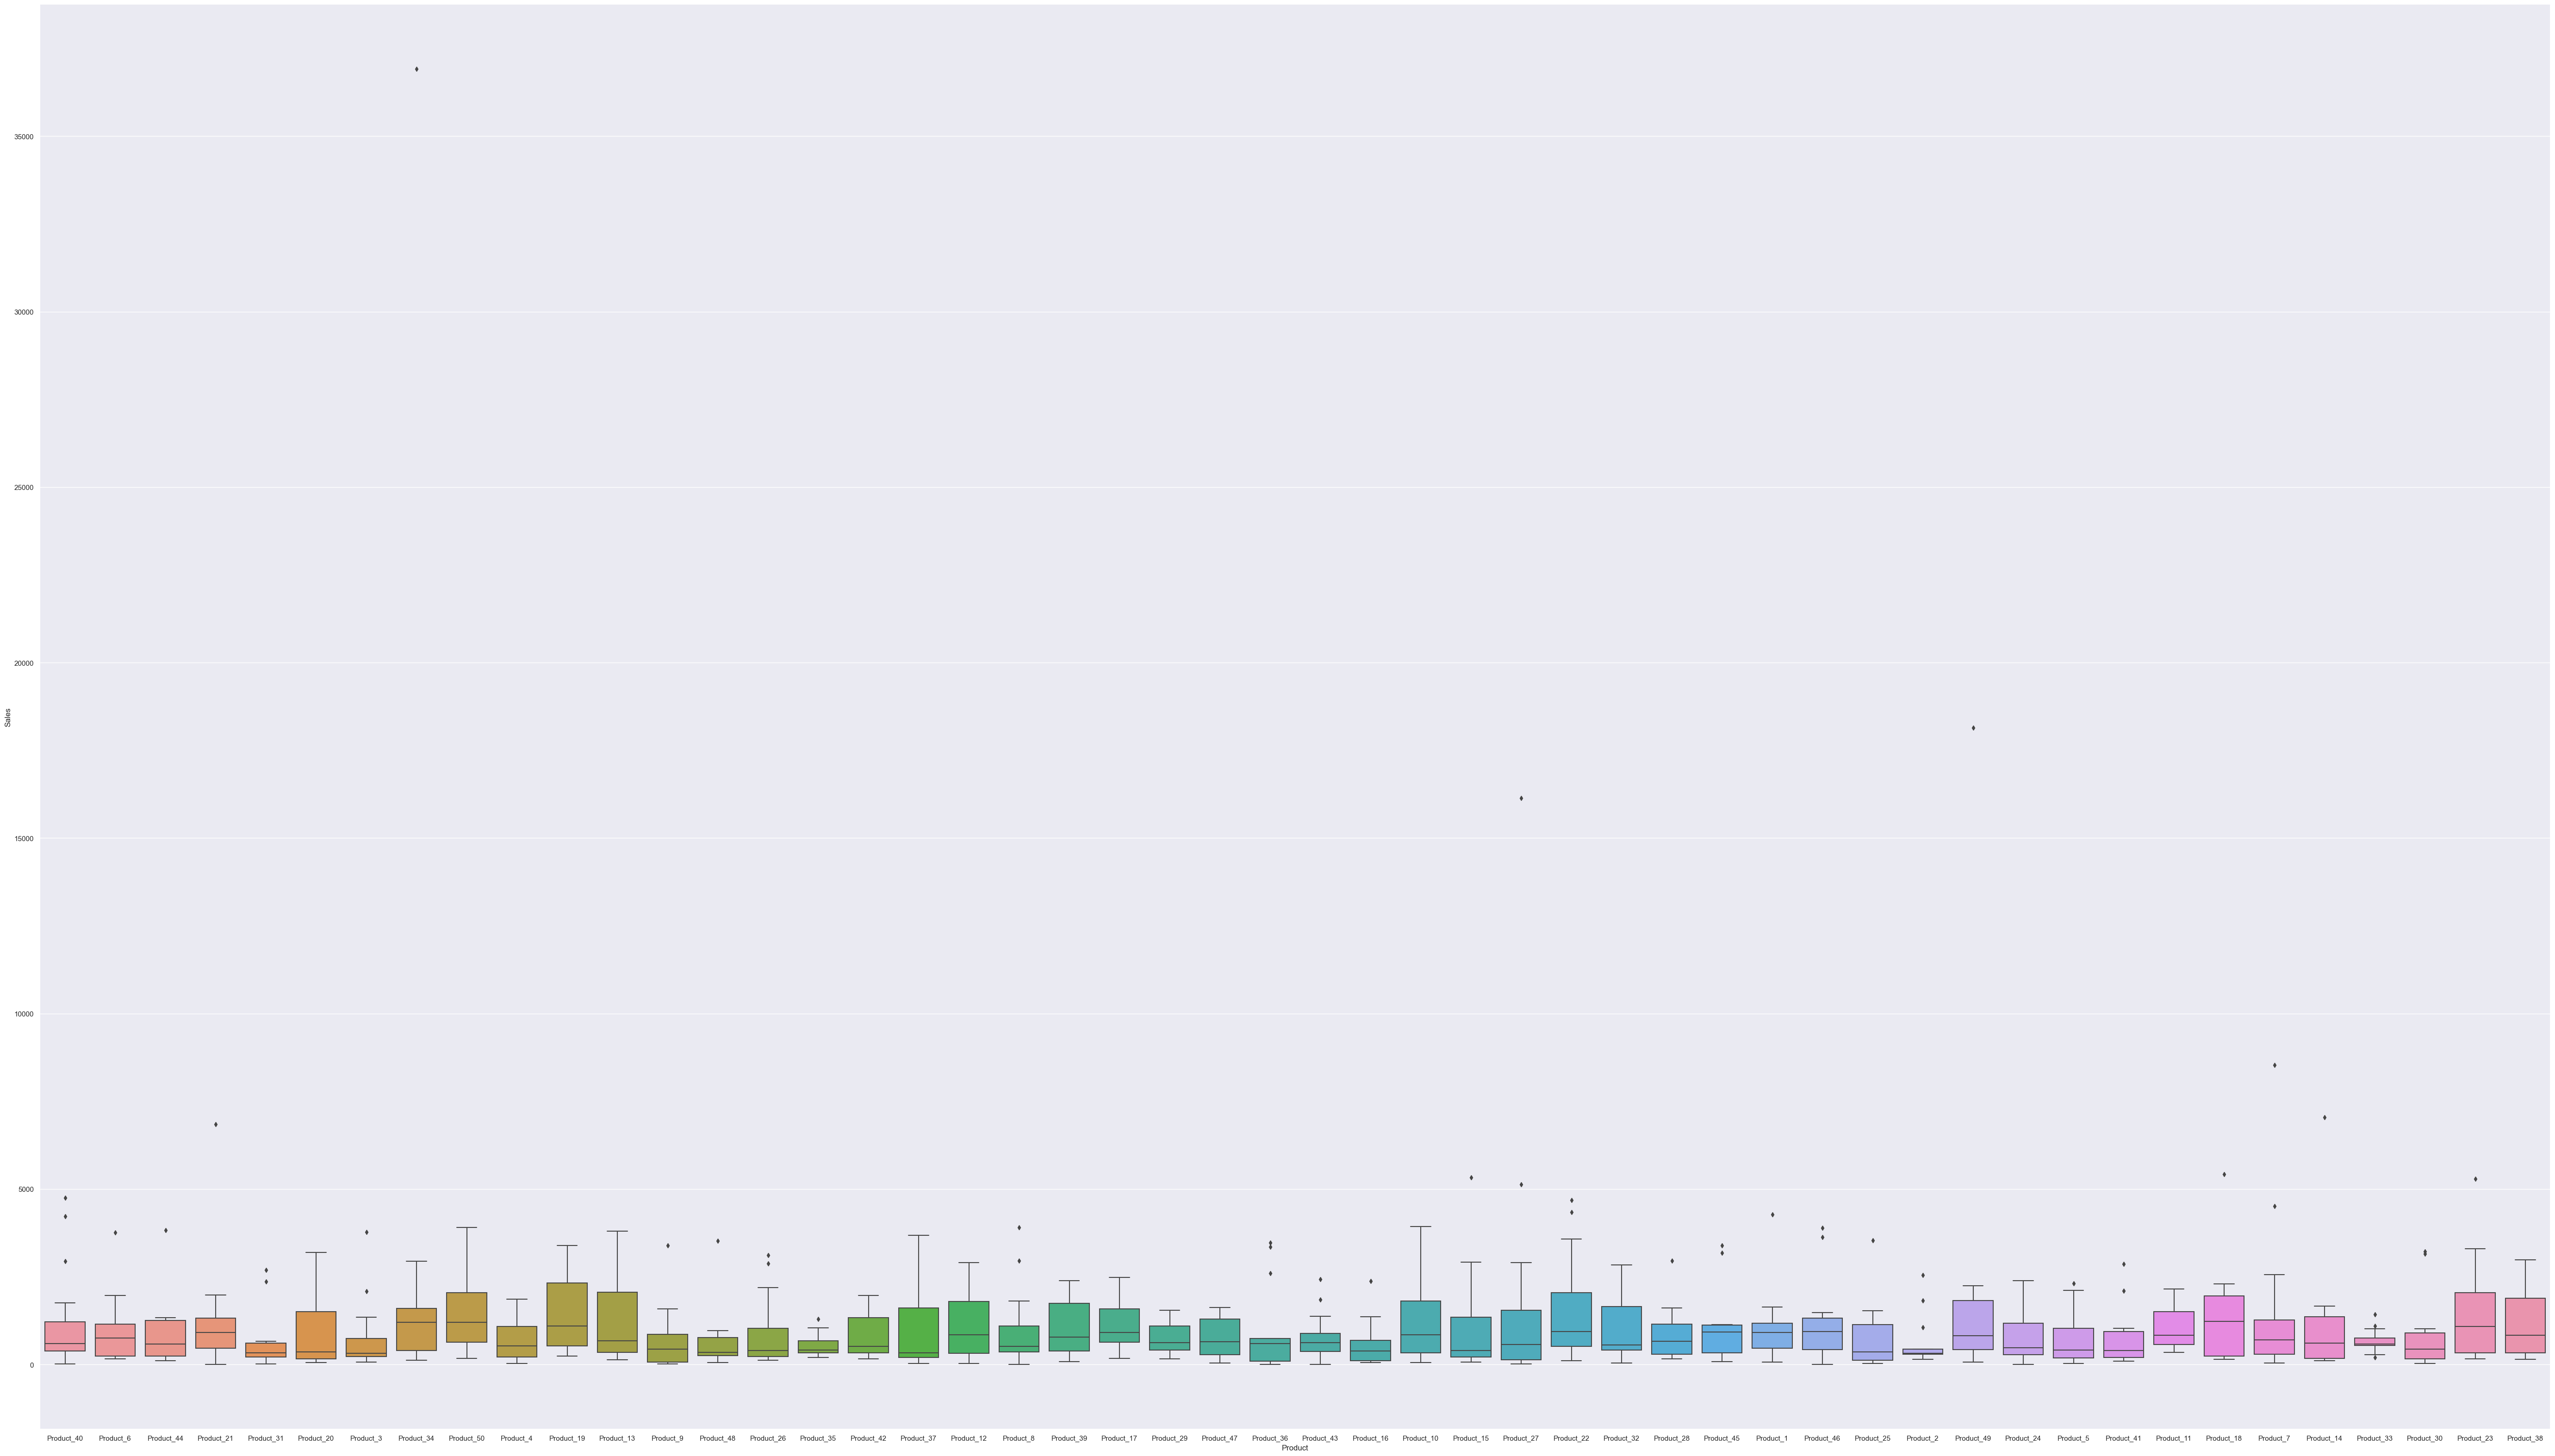

In [116]:
# Plot the box diagram to see outlier
sns.set(rc={'figure.figsize':(70,40)})
sns.boxplot(data = df_no_missing,x='Product',y='Sales')

#### Again, though certain sales seems to be preposterously high (such as the sales of product 34), given the fact that the price of every product can vary substantially acording to the result we get from "df_no_missing.groupby('Product').describe()", it is unlikely that the super high sales are derived from human errors, meaning that we should preserve those data records to reflect the accuracy of our analysis

/var/folders/pj/_wjkjh4d5jn_9kq1h6b68bk00000gn/T/ipykernel_51707/2422740536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_missing['product_id'] = df_no_missing['Product'].str.extract('(\d+)', expand=False).astype(int)
/var/folders/pj/_wjkjh4d5jn_9kq1h6b68bk00000gn/T/ipykernel_51707/2422740536.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_missing.sort_values('product_id', inplace=True)


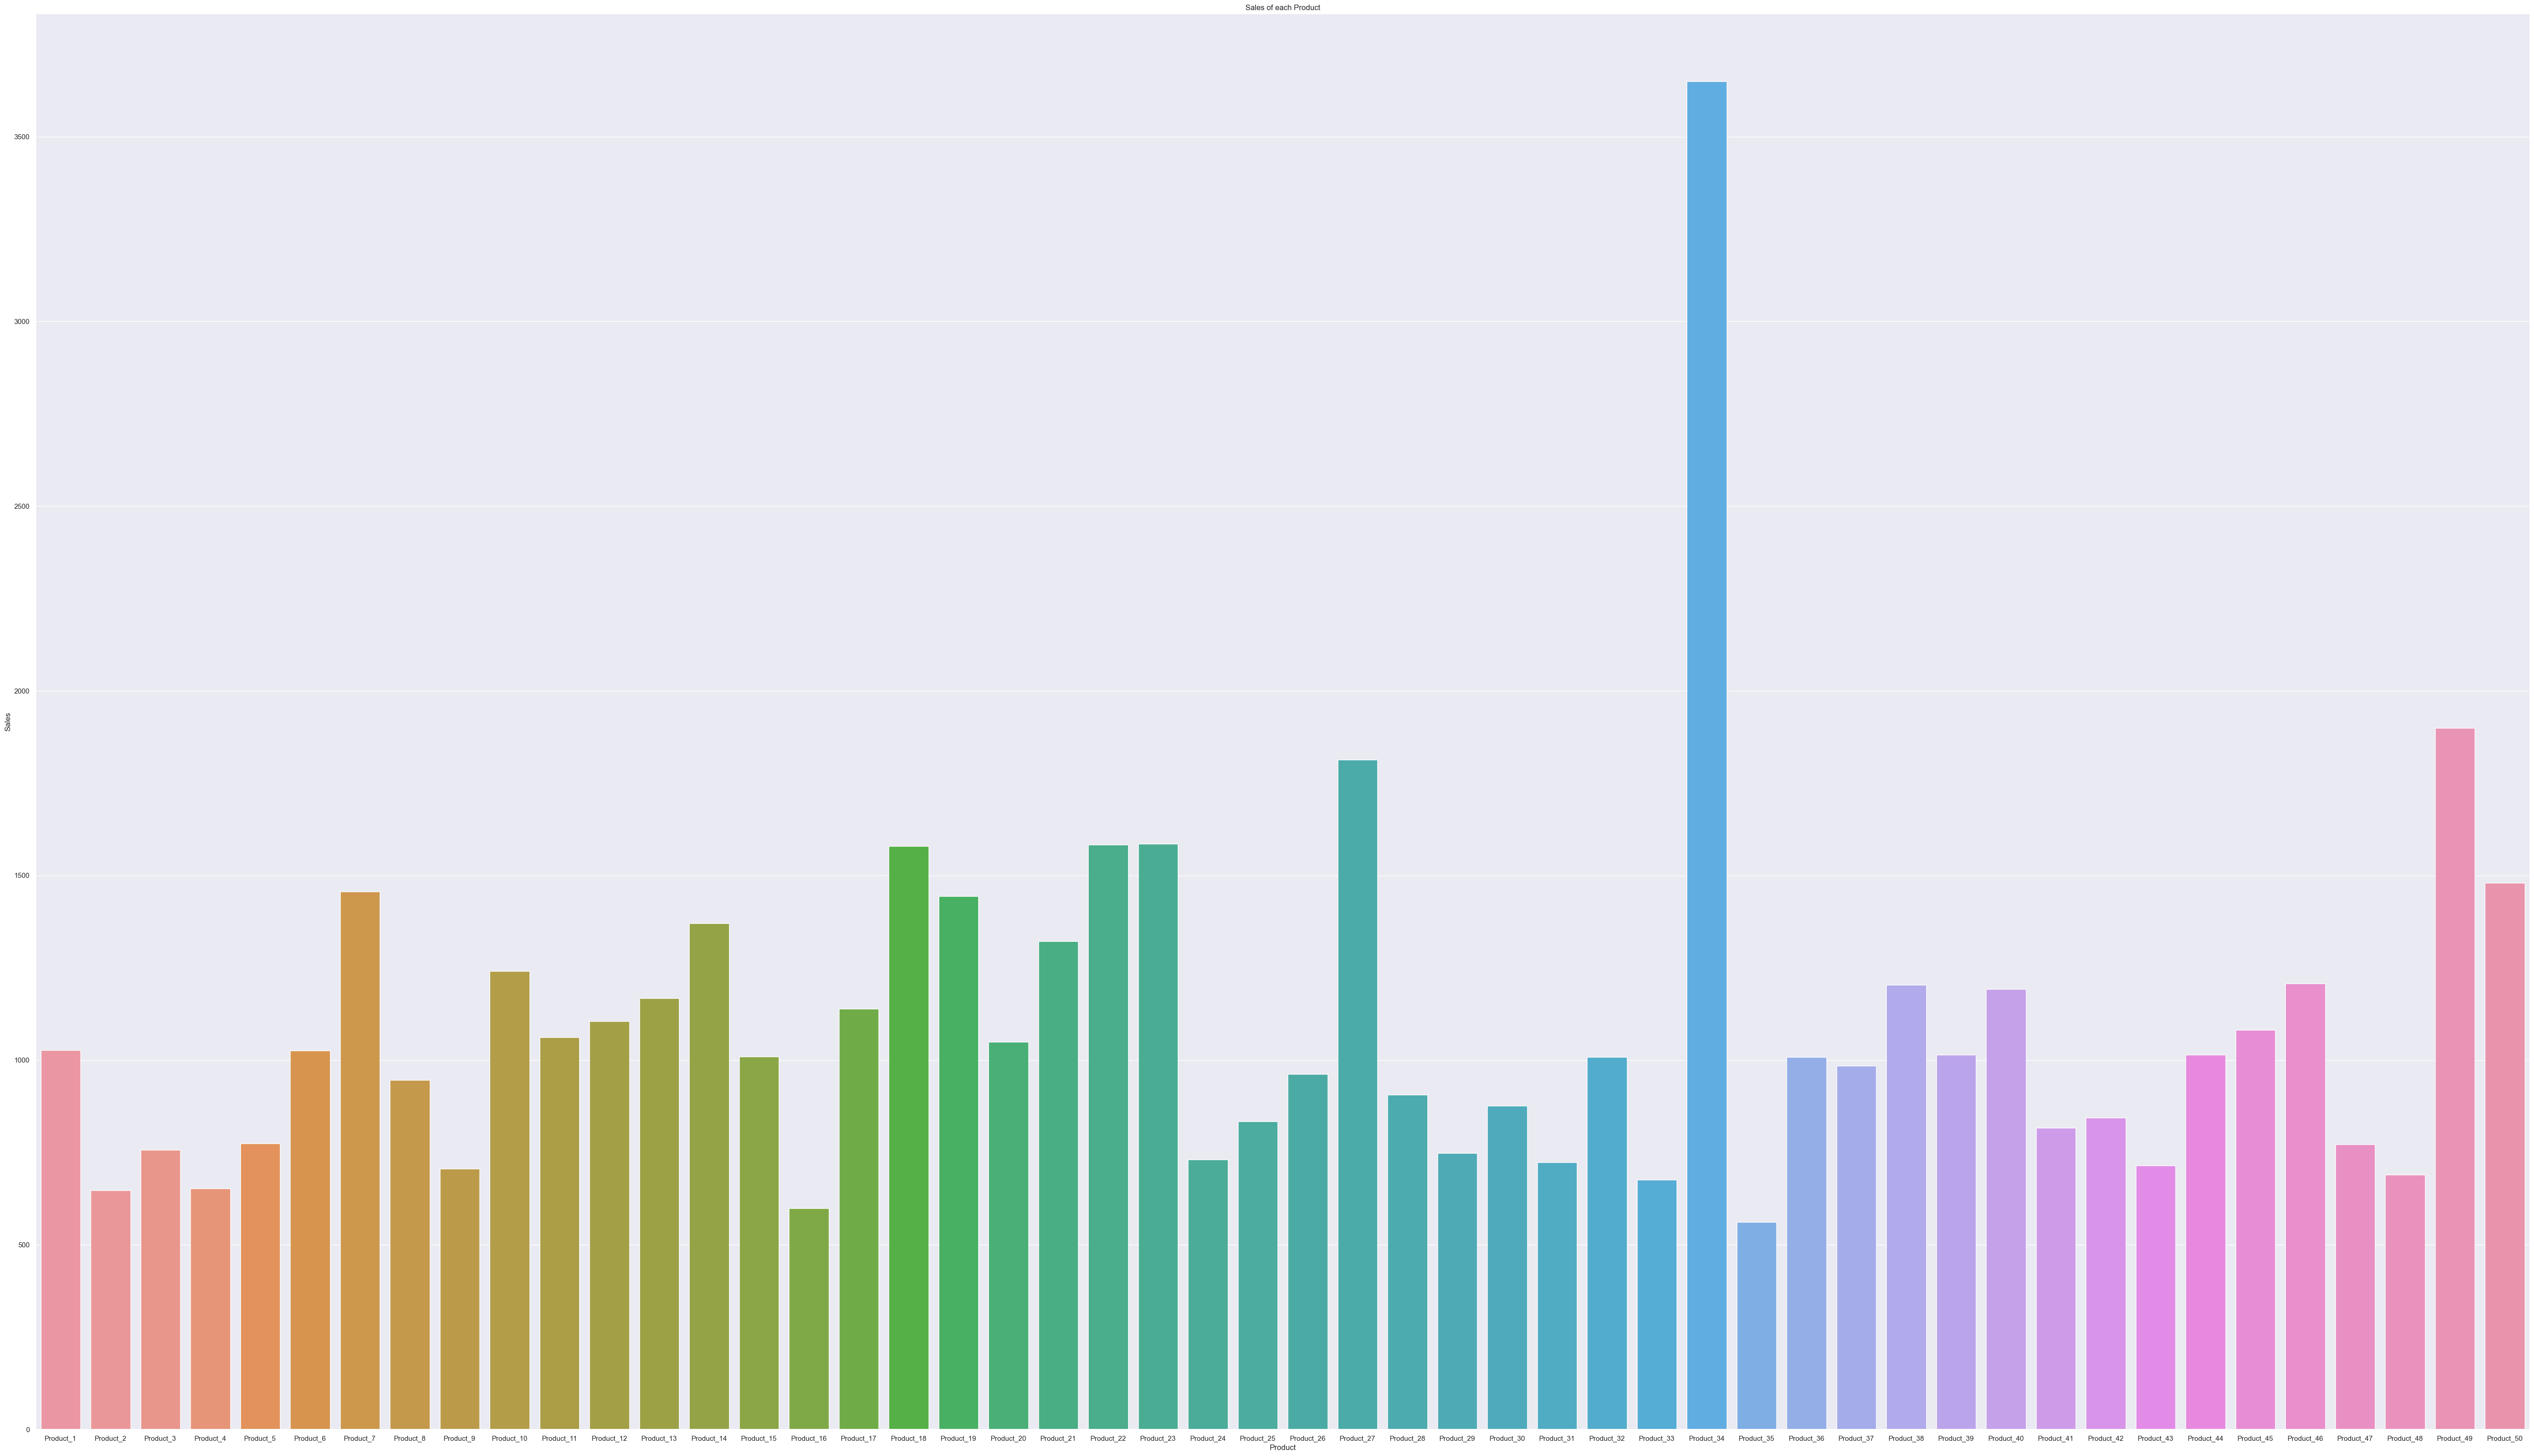

In [117]:
# Visualization on the sales performance of each product
# create new 'product_id' column that contains the digits from 'Product' column
df_no_missing['product_id'] = df_no_missing['Product'].str.extract('(\d+)', expand=False).astype(int)
df_no_missing.sort_values('product_id', inplace=True)

# As shown by the graph, Product 34 has the highest sales, which can be partially attributed to its highest price among all the other prodducts
# while the product 35 and 16 seems to be unpopular products due to its relatively lower sales 

sns.barplot(x = "Product", y="Sales", errorbar = None, data = df_no_missing)
plt.title("Sales of each Product")
plt.show()


/var/folders/pj/_wjkjh4d5jn_9kq1h6b68bk00000gn/T/ipykernel_51707/666010770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_missing['region_id'] = df_no_missing['Region'].str.extract('(\d+)', expand=False).astype(int)
/var/folders/pj/_wjkjh4d5jn_9kq1h6b68bk00000gn/T/ipykernel_51707/666010770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_missing.sort_values('region_id', inplace=True)


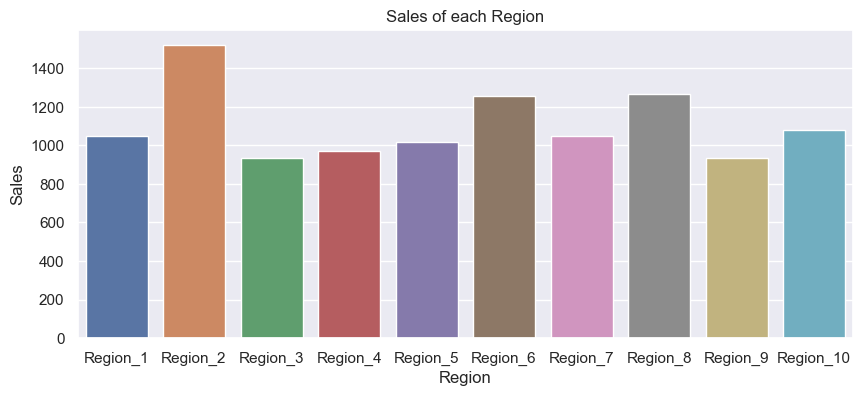

In [118]:
# Visualization on the sales performance of at each region
df_no_missing['region_id'] = df_no_missing['Region'].str.extract('(\d+)', expand=False).astype(int)
df_no_missing.sort_values('region_id', inplace=True)

# As the graph show, Region 2 contributes the highest amount of sales to the company, while Region 3 and 9 contribute the least
# However, more than half of the regions contribute about the same amount of sales (around 1000), which may suggests that the 
# company can conduct some investigations on those regions to see if certain marketing campaigns can be implemented to generate 
# more revenues from those regions, which will eventually let the sales of those regions differentiate from each other.
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(x = "Region", y="Sales", data = df_no_missing, errorbar = None)
plt.title("Sales of each Region")
plt.show()


/var/folders/pj/_wjkjh4d5jn_9kq1h6b68bk00000gn/T/ipykernel_51707/4287359838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_missing.sort_values('product_id', inplace=True)


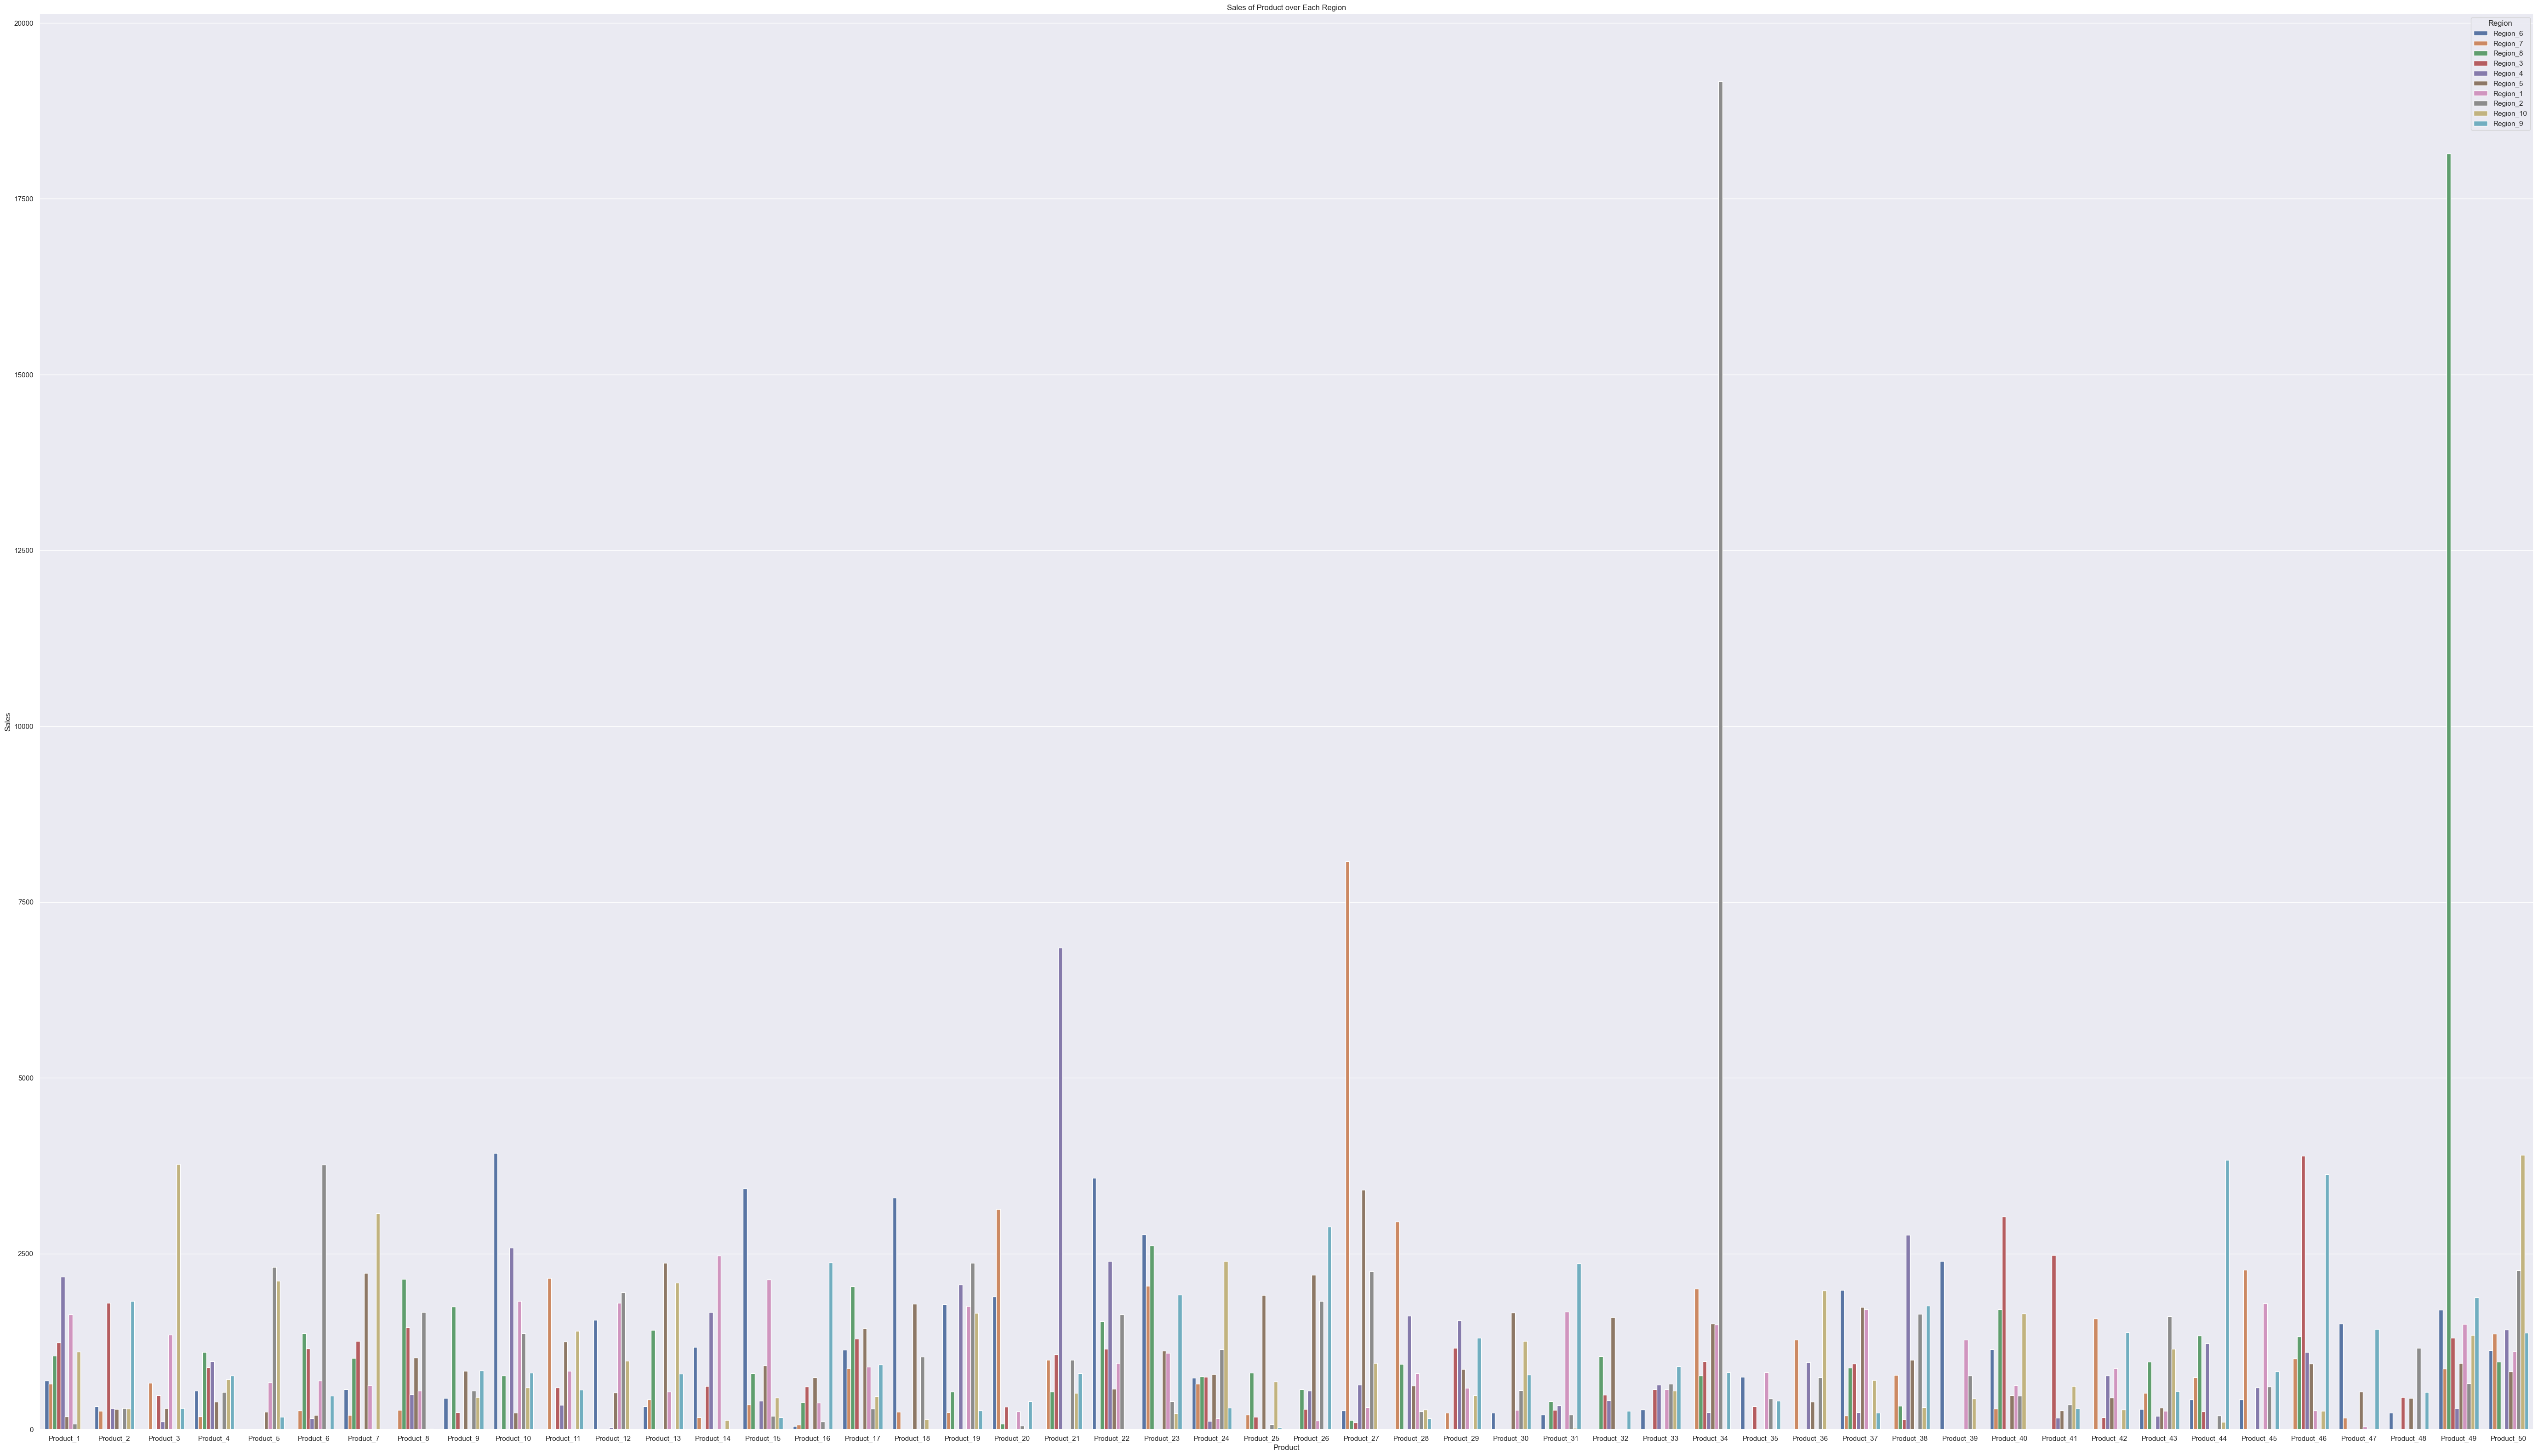

In [119]:
# Visualization of sales performance, products, and region in one graph 
# Note: This graph is not produced first since it is too big, but lots of business insights can be generated from it.
df_no_missing.sort_values('product_id', inplace=True)

# From this comprehensive graph, aligning with the previous conclusions we have drawed,
# the region 2 contributed the highest sales by spending trememdously on the product 34, which 
# may indicates that there exist certain correlations between the product 34 and the characteristics of the residents of Region 2
# Moreover, unexpectedly, the region 8 has spent on the product 49 about the equal amount with region 2 on product 34,
# which is not captured by the previous 2 graphs. This implies some business opportunities for the company to investigate
# such as finding out why region 8 residents are willing to spend so much on product 49, while residents of other regions do not.
# If the preferences of the region 8 on product 49 can be generalized, the company's revenue can be increased significantly.

sns.set(rc={'figure.figsize':(70,40)})
sns.barplot(x = "Product", y="Sales", hue= "Region", errorbar = None, data = df_no_missing)
plt.title("Sales of Product over Each Region")
plt.show()

#### Visualizing the sales data as time-series

In [129]:
# Convert object type to datetime object
df_no_missing["Sale Date"] = df_no_missing["Sale Date"].astype('datetime64[ns]')
df_no_missing.sort_values(by='Sale Date', inplace = True)
df_no_missing


/var/folders/pj/_wjkjh4d5jn_9kq1h6b68bk00000gn/T/ipykernel_51707/367454657.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pj/_wjkjh4d5jn_9kq1h6b68bk00000gn/T/ipykernel_51707/367454657.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Product,Region,Price,Units Sold,Sale Date,Sales,product_id,region_id
1,Product_40,Region_2,46.19,10.0,2022-01-02,461.90,40,2
3,Product_6,Region_8,143.47,8.0,2022-01-04,1147.76,6,8
4,Product_44,Region_4,122.54,10.0,2022-01-05,1225.40,44,4
5,Product_21,Region_8,15.76,20.0,2022-01-06,315.20,21,8
6,Product_31,Region_10,1.60,11.0,2022-01-07,17.60,31,10
...,...,...,...,...,...,...,...,...
994,Product_19,Region_8,83.76,6.0,2024-09-21,502.56,19,8
995,Product_41,Region_5,13.16,7.0,2024-09-22,92.12,41,5
996,Product_34,Region_8,70.22,15.0,2024-09-23,1053.30,34,8
997,Product_3,Region_9,42.79,7.0,2024-09-24,299.53,3,9


In [137]:
# Visualization of sales over time by product and region
# Reference: https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0
# Note: You can select the panel to focus on the sales line of a specific product

import plotly.graph_objects as go

sns.set(rc={'figure.figsize':(14,8)})
#extract color palette, the palette can be changed
list_product = list(set(df_no_missing['Product']))

pal = list(sns.color_palette(palette='viridis', n_colors=len( list_product)).as_hex())

fig = go.Figure()
for d,p in zip(list_product, pal):
    fig.add_trace(go.Scatter(x = df_no_missing[df_no_missing['Product']==d]['Sale Date'],
                             y = df_no_missing[df_no_missing['Product']==d]['Sales'],
                             name = d,
                             line_color = p, 
                             fill=None))   #tozeroy 

fig.show()

In [138]:
# Visualization of sales over time by product and region

import plotly.graph_objects as go

sns.set(rc={'figure.figsize':(14,8)})
#extract color palette, the palette can be changed
list_region = list(set(df_no_missing['Region']))

pal = list(sns.color_palette(palette='viridis', n_colors=len( list_region)).as_hex())

fig = go.Figure()
for d,p in zip(list_region, pal):
    fig.add_trace(go.Scatter(x = df_no_missing[df_no_missing['Region']==d]['Sale Date'],
                             y = df_no_missing[df_no_missing['Region']==d]['Sales'],
                             name = d,
                             line_color = p, 
                             fill=None))   #tozeroy 

fig.show()

### As shown by the above 2 graphs, if we focus on the eye-catching Product 34 and 49, as well as the most profitable region, Region 2, we will discover a pattern that the peaks in the sales of the product and of the region are concentrated on certain time period. For example, Region 2 has the peak in its sales during one or two months between Jan 2023 and Jul 2023, while the Product 34 and 49 have their own sales peaks in months between [Jan 2023 to Jul 2023] and [Jul 2022 to Jan 2023] respectively. This may encourage the companies to conduct some researches on what factors may have driven the sales so much at those specific periods. For example, were there some hidden events that indirectly boosted the sales? If there were, can we replicate the events to boost the sales again? If there are no such events, what business strategies can we develop to reattain the high sales of the Product 34 and 49 (or should we promote the other products to exploit more business potentials from the existing products ?) -> More business intelligence can be generated if more contexts are provided


### Data Cleaning and Missing Value Filling

Product       101
Region        100
Price         100
Units Sold    100
Sale Date       0
dtype: int64


<Axes: xlabel='missing', ylabel='index'>

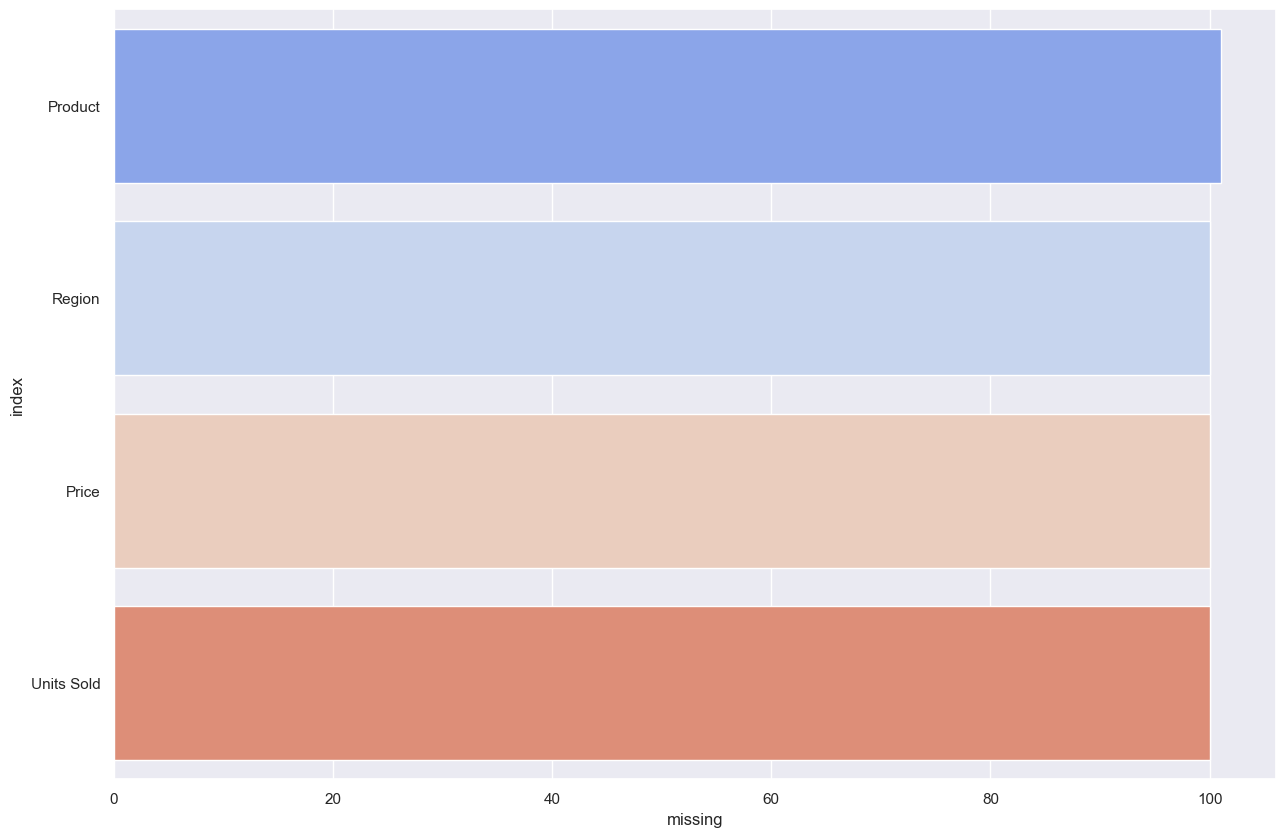

In [162]:
# Plot the missing value count as a bar chart


missing = df.isnull().sum()
print(missing)

missing = missing[missing>0]

miss = pd.DataFrame(missing, columns=['missing'])

miss = miss.reset_index()


miss.sort_values(by='missing', ascending=False, inplace=True)

plt.figure(figsize=(15, 10))
sns.barplot(y = miss['index'], x= miss.missing, palette='coolwarm')

From Above, we know that the 4 features (Product, Units Sold, Price, Product) have similar number of missing values, which is around 10% of the total number of data records (around 100 out of 1050 records). Thus, we may try to see if we can simply drop the records that have any missing value

In [163]:
df_no_missing = df.dropna() # drop all rows with missing data
df_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 1 to 998
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     653 non-null    object 
 1   Region      653 non-null    object 
 2   Price       653 non-null    float64
 3   Units Sold  653 non-null    float64
 4   Sale Date   653 non-null    object 
dtypes: float64(2), object(3)
memory usage: 30.6+ KB


### According to above result, dropping all records with missing value is suboptimal,
### because we have removed about 30% of the data records from the dataset, which is undesirable
### Another missing value imputation stratgey we can try is: 

In [164]:
# Extract the records with "Product" being missing
# and drop those records because certain records have both "Product" and "Region" being missing, and we need to ensure that
# at least one of the categorical features being "missing value free" so that we can proceed our following 'grouped statistics replacement' imputation strategy.
# Moreover, the general categorical missing values imputation strategy (like filling in the missing values with the mode value) will not
# work well in this case (as many sales will then be incorrectly assigned to one product), resulting in false conclusions in the training phase later

df_product = df.dropna(subset='Product') # drop all rows with missing data based on a column
df_product

# Also, since we only have about 100 records with "Product" value being missing, which constitutes about 10% of the dataset
# it should be safe and plausible to drop the 100 records.

,Product,Region,Price,Units Sold,Sale Date
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
5,Product_21,Region_8,15.76,20.0,2022-01-06
...,...,...,...,...,...
994,Product_19,Region_8,83.76,6.0,2024-09-21
995,Product_41,Region_5,13.16,7.0,2024-09-22
996,Product_34,Region_8,70.22,15.0,2024-09-23
997,Product_3,Region_9,42.79,7.0,2024-09-24


In [165]:
# Check how many missing values we still have
df_product.isnull().sum()

Product        0
Region        90
Price         89
Units Sold    90
Sale Date      0
dtype: int64

### Grouped Statistics Replacement for the remaining 3 features: Filling in missing values by the statistics (mean or median for numeric features, mode for categorical features) associated with a particular group (in this case, the Product group)
#### Reason: This strategy leverages the existing values, and the statistic values are less overrepresented in the dataset (not a single value to fill in all the null places in each column), leading to better variances within the dataset (which is desirable for the later model training phase)

#### Note: We can also use the KNN (k-Nearest Neighbors) imputer to fill in all the missing numeric values, which may yield better imputation result than the Grouped Statistics Replacement strategy, but since training a KNN model in this case can be overcomplicated and time consuming, we decide to use the more efficient Grouped Statistics Replacement strategy. (However, in reality, we may try out both strategies to compare the model performances on the 2 different imputation methods, and choose the one that yields a higher model evaluation metric score)

In [166]:
# Filling all the numeric features by their median values
# The reason for choosing median over mean is that since we have preserved the outliers in both the "Price" and "Units Sold"
# features (while the variances of 'Price' across all "Product" are high according to the table we get from df_no_missing.groupby('Product').describe()), 
# the feature mean value tends to be a more biased value and failed to represent the grouped feature value distribution accurately,
# leading it to be a suboptimal value for imputation. Thus, we use median to fill in the missing "Price" and "Units Sold" values in each product group

df_product['Price'] = df_product['Price'].fillna(df_product.groupby('Product')['Price'].transform('median'))
df_product['Units Sold'] = df_product['Units Sold'].fillna(df_product.groupby('Product')['Units Sold'].transform('median'))
df_product.isnull().sum() 

/var/folders/pj/_wjkjh4d5jn_9kq1h6b68bk00000gn/T/ipykernel_51707/3732958994.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pj/_wjkjh4d5jn_9kq1h6b68bk00000gn/T/ipykernel_51707/3732958994.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Product        0
Region        90
Price          0
Units Sold     0
Sale Date      0
dtype: int64

In [167]:
# Filling in the categorical features by their mode values
# Since there is no mean or median value for categorical feature, mode is the only option, while it is also simple to 
# compute mode and use it for imputation, leading this imputation strategy to be highly efficient
df_product['Region'] = df_product['Region'].fillna(df_product.groupby('Product')['Region'].transform(lambda x: x.mode().iloc[0]))
# Note: x.mode() gives a list of mode for a Product group, so we need to use .iloc[0] to get the mode value

df_product.isnull().sum()

/var/folders/pj/_wjkjh4d5jn_9kq1h6b68bk00000gn/T/ipykernel_51707/1134921166.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Product       0
Region        0
Price         0
Units Sold    0
Sale Date     0
dtype: int64

### Visualize the data after cleaning

/var/folders/pj/_wjkjh4d5jn_9kq1h6b68bk00000gn/T/ipykernel_51707/3987441715.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pj/_wjkjh4d5jn_9kq1h6b68bk00000gn/T/ipykernel_51707/3987441715.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pj/_wjkjh4d5jn_9kq1h6b68bk00000gn/T/ipykernel_51707/3987441715.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

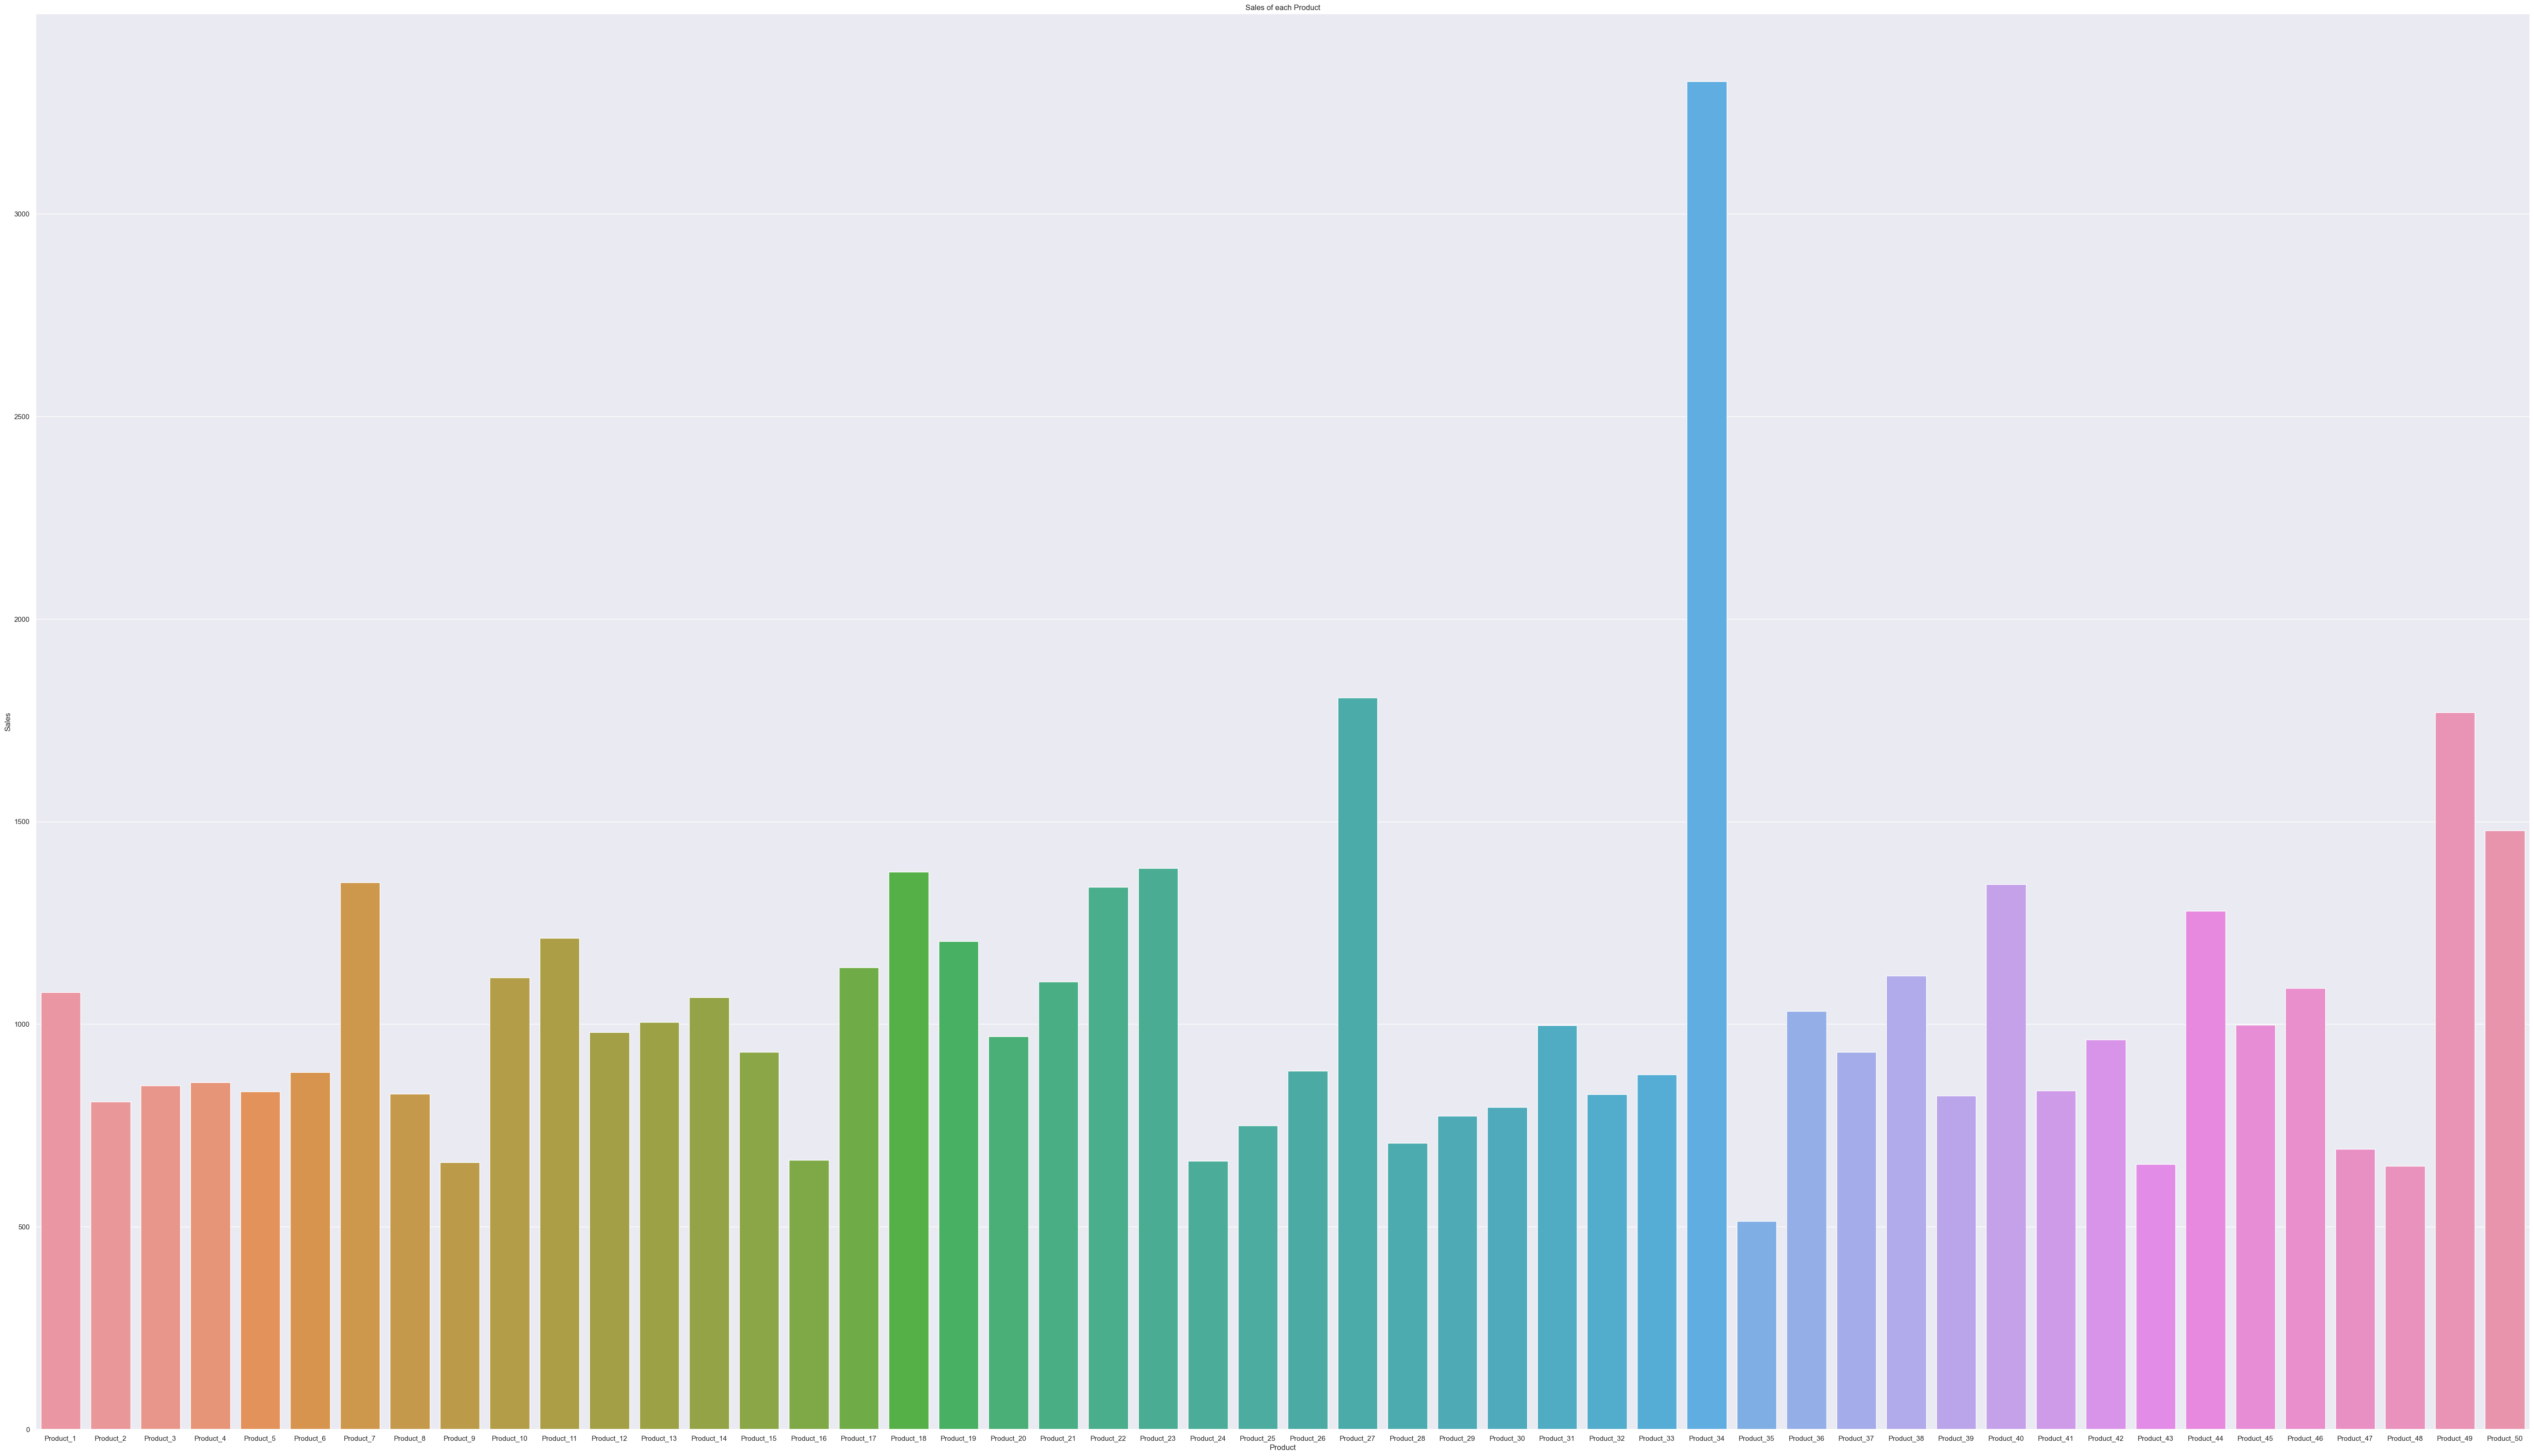

In [173]:
# create the sales column again, sort the records by its product id, then visualize
df_product['Sales'] = df_product['Price'] * df_product['Units Sold']
df_product['product_id'] = df_product['Product'].str.extract('(\d+)', expand=False).astype(int)
df_product.sort_values('product_id', inplace=True)

sns.set(rc={'figure.figsize':(70,40)})
sns.barplot(x = "Product", y="Sales", errorbar = None, data = df_product)
plt.title("Sales of each Product")
plt.show()


/var/folders/pj/_wjkjh4d5jn_9kq1h6b68bk00000gn/T/ipykernel_51707/2392745074.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pj/_wjkjh4d5jn_9kq1h6b68bk00000gn/T/ipykernel_51707/2392745074.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



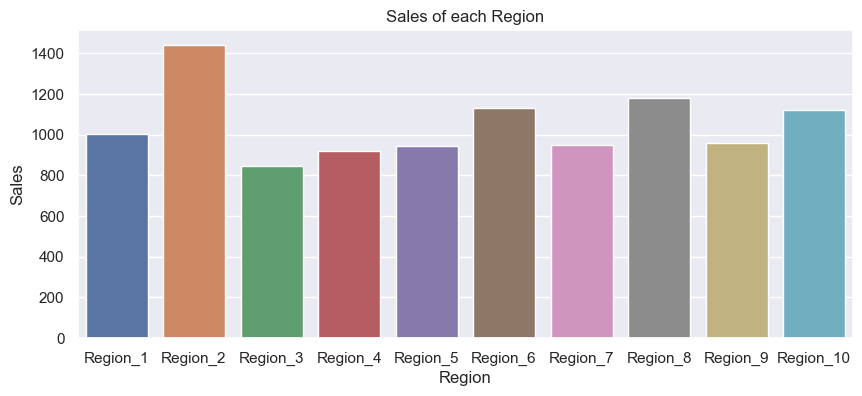

In [174]:
df_product['region_id'] = df_product['Region'].str.extract('(\d+)', expand=False).astype(int)
df_product.sort_values('region_id', inplace=True)

# As the graph show, Region 2 contributes the highest amount of sales to the company, while Region 3 and 9 contribute the least
# However, more than half of the regions contribute about the same amount of sales (around 1000), which may suggests that the 
# company can conduct some investigations on those regions to see if certain marketing campaigns can be implemented to generate 
# more revenues from those regions, which will eventually let the sales of those regions differentiate from each other.
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(x = "Region", y="Sales", data = df_product, errorbar = None)
plt.title("Sales of each Region")
plt.show()

### As we can see from above, the general distributions of the data do not differ significantly from the distributions we obtained from the non-null records, indicating that our imputation strategy does not affect the underlying patterns within the data, which is also a indication of a well-chosen imputation strategy

## Q: What conclusions can you draw about sales performance of various products and regions? and What recommendations do you have for the business?
#### A: When looking at Product vs Sales solely, Product 34 has the highest sales, which can be partially attributed to its highest price upper bound among all the other products, while the product 35 and 16 seems to be unpopular products due to its relatively lower sales. When looking at Region vs Sales solely, Region 2 contributes the highest amount of sales to the company, while Region 3 and 9 contribute about the least. However, more than half of the regions contributed about the same amount of sales (around 1000) to the company, which may suggests that the company can conduct some investigations on those regions to see if certain marketing campaigns can be implemented to generate more revenues from those regions, which will eventually let the sales of those regions differentiate from each other.

#### Moreover, when looking at the Product vs Region vs Sales, aligning with the previous conclusions we have drawn, the region 2 contributed the highest sales by spending trememdously on the product 34, which may indicates that there exist certain correlations between the product 34 and the characteristics of the residents of Region 2. Furthermore, unexpectedly, region 8 has spent on product 49 about the equal amount with region 2 on product 34, which is not captured by the previous 2 graphs. This implies some business opportunities for the company to investigate such as finding out why region 8 residents are willing to spend so much on product 49, while residents of other regions do not. If the preferences of the region 8 on product 49 can be generalized, the company's revenue can be increased significantly.

#### In addition, according to the 2 interactive time-series sales graphs, if we focus on the eye-catching Product 34 and 49, as well as the most profitable region, Region 2, we will discover a pattern that the peaks in the sales of the product and of the region are concentrated on certain time period. For example, Region 2 has the peak in its sales during one or two months between Jan 2023 and Jul 2023, while the Product 34 and 49 have their own sales peaks in months between [Jan 2023 to Jul 2023] and [Jul 2022 to Jan 2023] respectively. This may encourage the companies to conduct some researches on what factors may have driven the sales so much at those specific periods. For example, were there some hidden events that indirectly boosted the sales? If there were, can we replicate the events to boost the sales again? If there are no such events, what business strategies can we develop to reattain the high sales of the Product 34 and 49 (or should we promote the other products to exploit more business potentials from the existing products ?) -> More business intelligence can be generated if more contexts are provided.


## Q: Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

#### A: I have described what and why I have did in each cell, please go through the documentations I written for each cell. But, in summary, I have firstly dropped all the duplicated records, because it should be safe to assume that the sales that occur in the same region, same date, same price and the same units sold are due to human error during the data collection phase, rather than capturing the actual sales of the products. Thus, it should be sensible to drop the duplicates. Then, after the EDA, I start to fill in the missing values in the dataset. It is noteworthy that dropping all records with missing value is suboptimal strategy, because we will remove about 30% of the data records from the dataset, which is undesirable. Thus, I decide to do the following:

#### First, I drop the records with "Product" being missing, because certain records have both "Product" and "Region" being missing, and we need to ensure that at least one of the categorical features being "missing value free" so that we can proceed my following 'grouped statistics replacement' imputation strategy. Moreover, the general categorical missing values imputation strategy (like filling in the missing values with the mode value) will not work well in this case (as many sales will then be incorrectly assigned to one product only), resulting in false conclusions in the later training phase. In addition, since we only have about 100 records with "Product" value being missing, which constitutes about 10% of the dataset, it should be safe and plausible to drop the 100 records.

#### After ensuring the grouping variable "Product" does not have any missing value, we can use the Grouped Statistics Replacement for the remaining 3 features, which is filling in missing values by the statistics (mean or median for numeric features, mode for categorical features) associated with a particular group (in this case, the Product group). The reason of using this strategy is that this strategy leverages the existing values, and the statistic values are less overrepresented in the groups (not a single value to fill in all the null places in each column), leading to better variances within the dataset (which is desirable for the later model training phase). After visualizing the filled dataset, we can see that the general distributions of the data do not differ significantly from the distributions we obtained from the non-null records, indicating that our imputation strategy does not affect the underlying patterns within the data, which is also a indication of a well-chosen imputation strategy

#### Note: We can also use the KNN (k-Nearest Neighbors) imputer to fill in all the missing numeric values, which may yield better imputation result than the Grouped Statistics Replacement strategy, but since training a KNN model in this case can be overcomplicated and time consuming, we decide to use the more efficient Grouped Statistics Replacement strategy. (However, in reality, we may try out both strategies to compare the model performances on the 2 different imputation methods, and choose the one that yields a higher model evaluation metric score)

#### Note: I decide to fill all the missing numeric feature values by their median values. The reason for choosing median over mean is that since we have preserved the outliers in both the "Price" and "Units Sold" features (while the variances of 'Price' across all "Product" are high according to the table we get from df_no_missing.groupby('Product').describe()), the feature mean value tends to be a more biased value and failed to represent the grouped feature value distribution accurately, leading it to be a suboptimal value for imputation. Thus, we use median to fill in the missing "Price" and "Units Sold" values in each product group. As for the categorical features, we fill in them by their mode values. Since there is no mean or median value for categorical feature, mode is the only option, while it is also simple to compute mode and use it for imputation, leading this imputation strategy to be highly efficient
